#### Regresion Logistica

##### Parte 1  - TITANIC - EDA

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv', encoding='UTF-8',sep=',')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


np.float64(19.865319865319865)

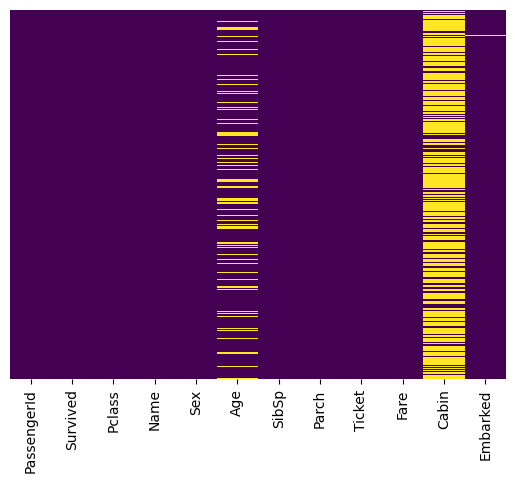

In [ ]:
# vere con un heat map donde pierdo la mayor cantidad de data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
(train.isnull().sum()['Age'] / train.count()['PassengerId']) * 100
# con esto podemos ver en que columnas me falta data del todo el dataset, 
# el 19% der la data de edad esta vacia podemos utilizar alguna forma de imputacion de datos para 
#rellenar estos

In [13]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

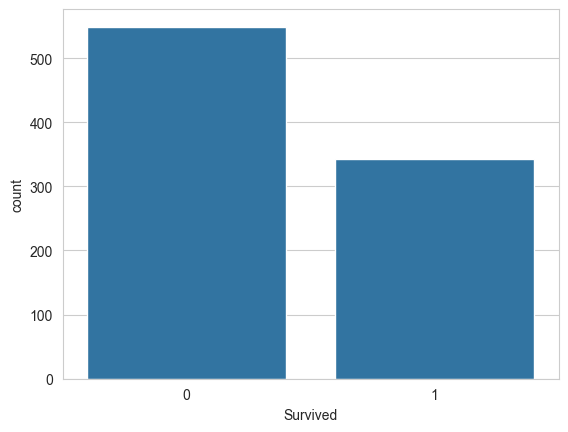

In [14]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

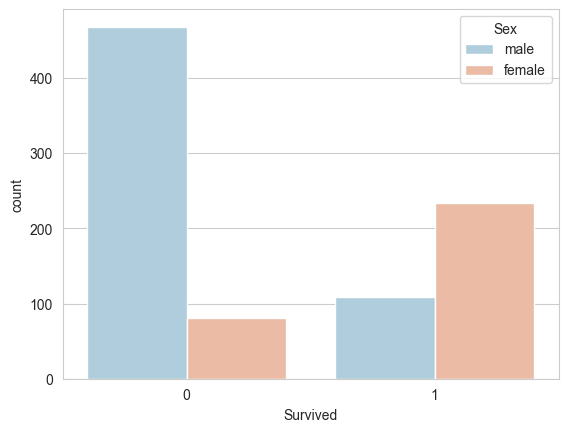

In [ ]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')
# podemos ver como la mayoria de los que no sobrevivieron fueron hombres, por lo que 
# tenderiamos a tener estos resultados en cualquier modelo logistico 


<Axes: xlabel='Survived', ylabel='count'>

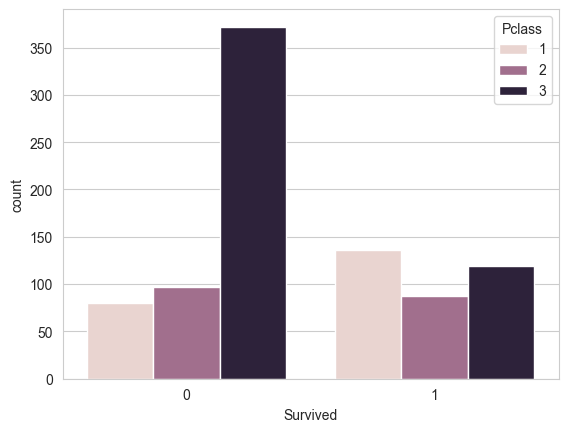

In [ ]:
sns.countplot(x='Survived', data=train, hue='Pclass')
# casi toda las personas que murieron fueron de clases pobre osea de la 3ra clase

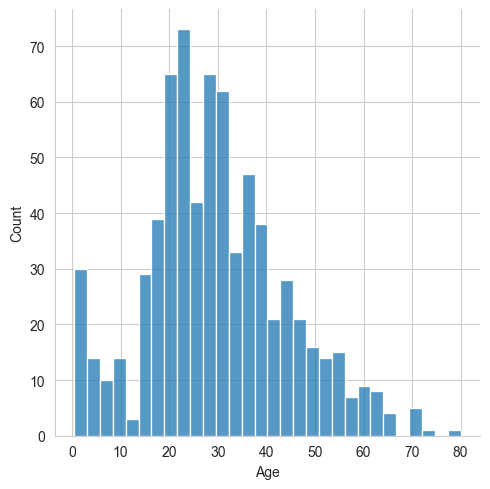

In [ ]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)
# por aca vemos la distribucion de la de edad de los que estaban en el barco
# si te das cuenta la media puede rondar los 20-30 años y vemos que habian varios bebes a bordo


<Axes: ylabel='Frequency'>

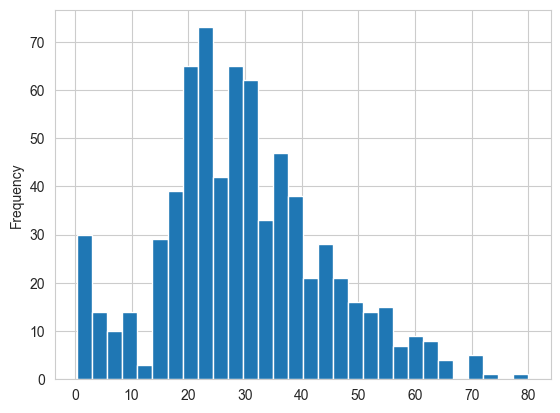

In [19]:
train['Age'].plot.hist(bins=30)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

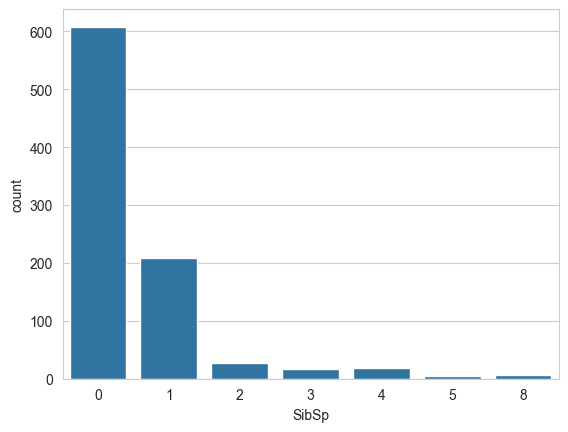

In [ ]:
sns.countplot(x='SibSp', data=train)
# que nos dice esto, la columna tomda es una que nos da la info de cuantos familiares habia de la persona que estaba en el barco
# # lo que nos deja saber que la mayoria de personas dentro viajaba sola 

<Axes: >

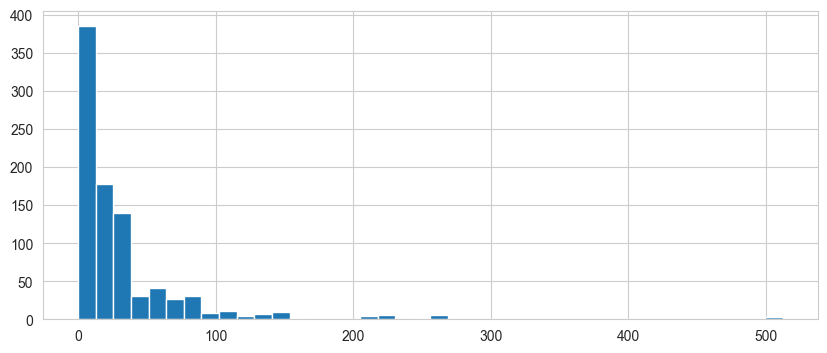

In [ ]:
train['Fare'].hist(bins=40, figsize=(10,4))
#paar ve4r la distribucion de lo que pago la gente por estar en el barco, casi todo esta
 # por debajo de 100 dolares por lo que se vendieron los boletos mas barato, lo que 
 # tiene sentido, vienod quienes murieron mas, al ser mas en el barco

In [24]:
import plotly.express as px

In [29]:
fig = px.histogram(train, x='Fare')
fig.show()

##### Parte 2 - TITANIC - Clean our Data

<Axes: xlabel='Pclass', ylabel='Age'>

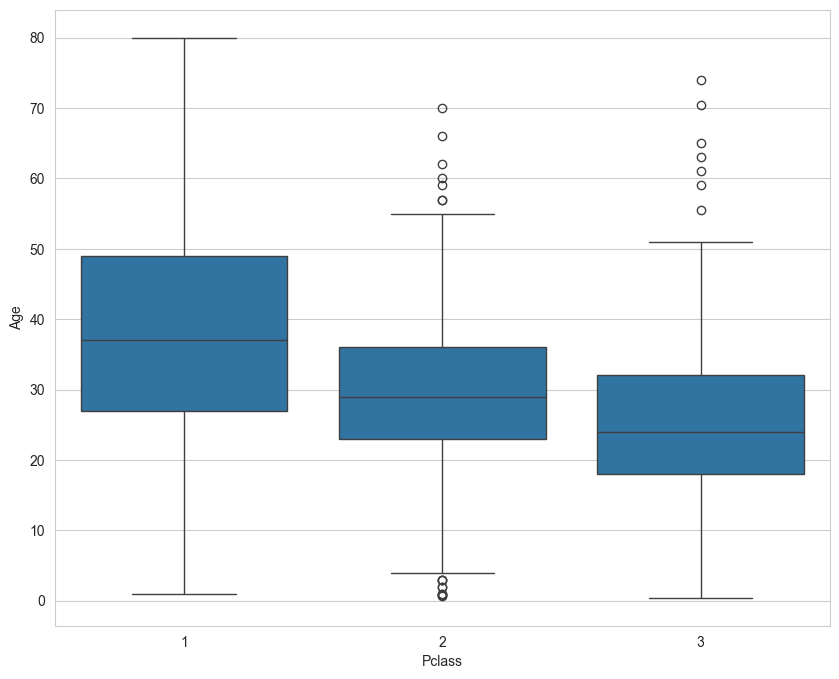

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [42]:
def impute_age(cols):
    Age = cols.iloc[0] # mas seguro seria acceder por etiequetas cols['Age']
    Pclass = cols['Pclass']

    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass']== 1]['Age'].mean()
        elif Pclass == 2:
            return train[train['Pclass']== 2]['Age'].mean()
        else:
            return train[train['Pclass']== 3]['Age'].mean()
    else:
        return Age

In [43]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<Axes: >

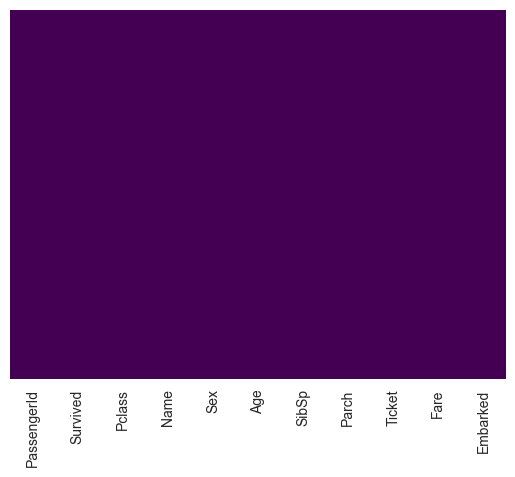

In [48]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [45]:
# como la columna de la cambina tiene tantos missing value mejor le hacemos drop
train.drop('Cabin', axis=1, inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
train.dropna(inplace=True)

<Axes: >

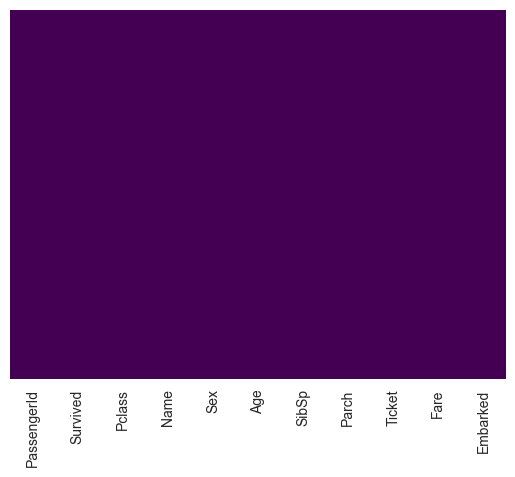

In [49]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [50]:
# Ahora no tengo missing values

In [54]:
# ahora volvermos las variables categorias, a variables dummies, osea 1/0 por 
# que pandas y el modelo no enteindes de hombre o mujer
sex = pd.get_dummies(train['Sex'], drop_first=True,dtype='float') #-- esto me da dos columnas por lo que si las dejo las dos
# en un moemnto me daran problemas de colinealidad si quiero predecir una con la otra, en este caso es tonto
# pero a la orden de quedarme solo con una columna que e sla que quiero hacer  me vale quedarme asi y 
# llmar la columa sexo
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [57]:
embark = pd.get_dummies(train['Embarked'],dtype='float', drop_first=True)

In [58]:
train = pd.concat([train,sex,embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0


In [59]:
# ahora como sexo y embarke lo eh hecho dummies puedo borrar las que lo tienen en letra
train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [61]:
# inlcuso el ID pasajero lo podemos borra por que no nos sirve para nada
train.drop('PassengerId', axis=1,inplace=True)

In [62]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


##### Parte 3 - TITANIC - Train and Predict

In [65]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()

In [70]:
logmodel.fit(X_train, y_train)

c:\Users\Erick J. Sarante\Desktop\Erick_Curso\Data_Sci_2\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [71]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, predictions)) # aqui me da todas las metricas de las 
#cuales la teoria hablabamos

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       174
           1       0.84      0.69      0.76       120

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.81       294
weighted avg       0.82      0.82      0.82       294



In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
print(confusion_matrix(y_test, predictions))

[[158  16]
 [ 37  83]]
